<a href="https://colab.research.google.com/github/samhashiyam/MachineLearning/blob/main/MLcwipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd             # For loading and manipulating datasets
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For charts
import seaborn as sns           # For visuals

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/ml/Telco-Customer-Churndataset.csv', na_values=["", " ", "NA", "na", "nan"])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [6]:
#check no.of rows and columns
df.shape

(7043, 21)

In [7]:
#print all column names
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#check column data types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
#check for missing values
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.isnull().sum().sum()

np.int64(11)

# Visualizations

In [11]:
#SUMMARY STATISTICS

#numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#categorical
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [13]:
#target variable distribution
df['Churn'].value_counts()



,count
Churn,
No,5174
Yes,1869


<function matplotlib.pyplot.show(close=None, block=None)>

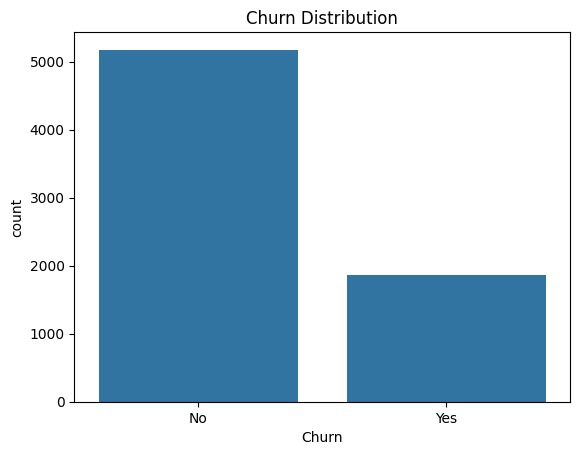

In [14]:
#Barchat for Churn distribution
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.show

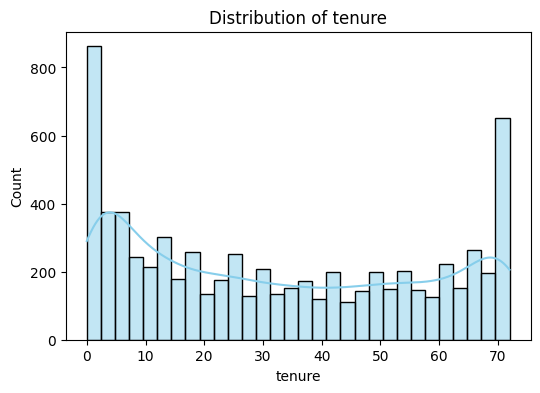

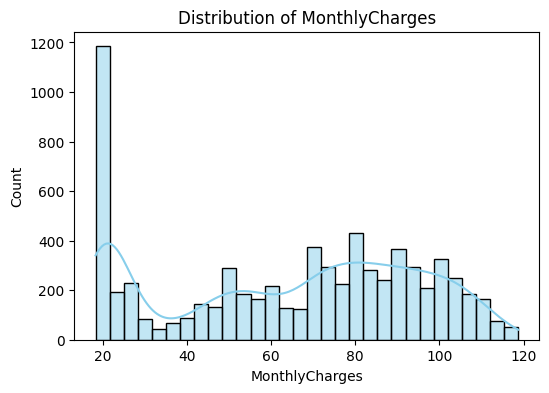

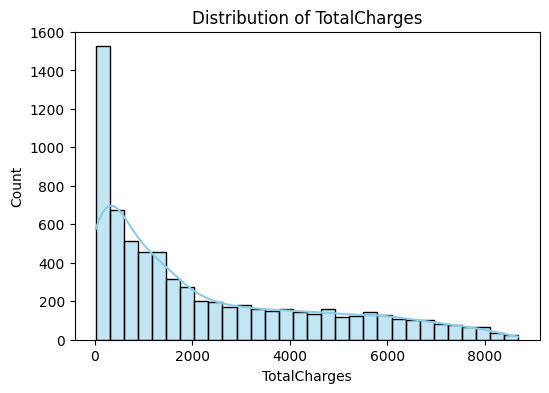

In [15]:
# HISTOGRAMS for numeric features


numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

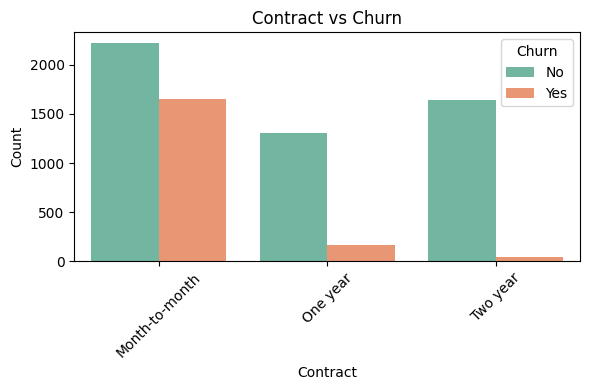

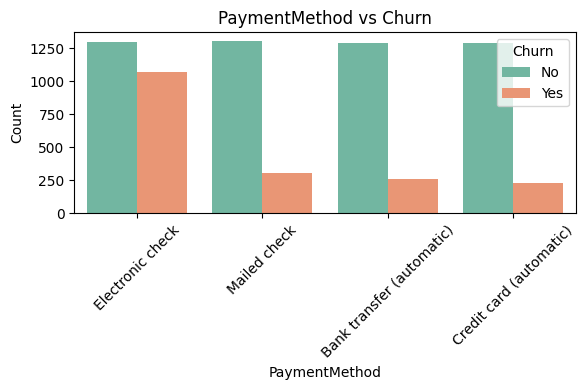

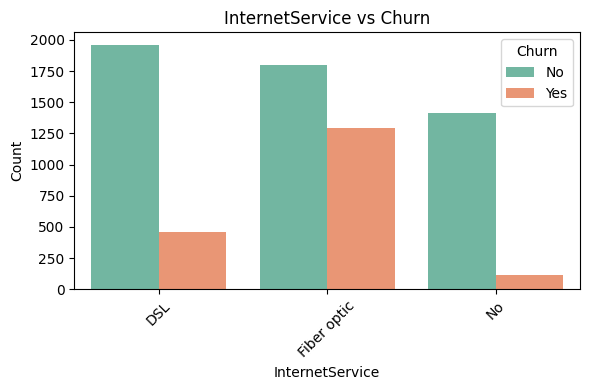

In [16]:
#BARCHART for Contract vs churn,PaymentMethod vs churn,InternetService vs churn
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

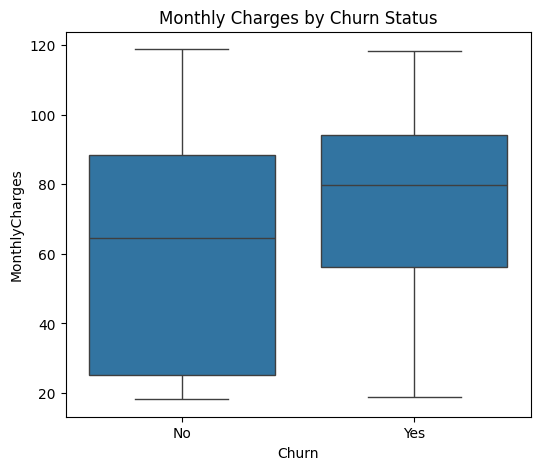

In [17]:
# BOXPLOT for MonthlyCharges vs Churn


plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()


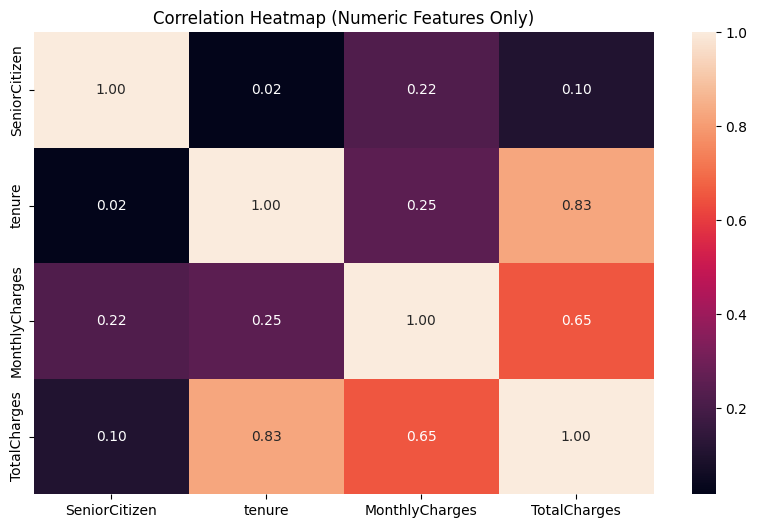

In [18]:
# FIXED CORRELATION HEATMAP

# only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



## Pre-Processing

In [19]:
#drop customerId column(unique values)
df = df.drop(['customerID'], axis=1)
print("Dropped customerID column")

Dropped customerID column


In [20]:
#Drop missing values

df = df.dropna()
print("Remaining rows:", df.shape)

Remaining rows: (7032, 20)


In [21]:
#convert yes/no columns to 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [22]:
#one-hot encoding (for categorical variables)
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


# Train-test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=df.drop(columns='Churn')
y=df['Churn']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [26]:
print("x_train:", X_train.shape)
print("y_train:", y_train.shape)
print("x_test:", X_test.shape)
print("y_test:", y_test.shape)

x_train: (5625, 30)
y_train: (5625,)
x_test: (1407, 30)
y_test: (1407,)


In [27]:
#feature scaling for nn
from sklearn.preprocessing import StandardScaler

In [28]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Desicion Tree Modeling

### Training the model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Predicting on the test data set

In [31]:
y_pred = dt_model.predict(X_test)


# Accuracy of base decision tree

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay,roc_curve, roc_auc_score

In [33]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.7036247334754797


In [34]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1033
           1       0.44      0.45      0.45       374

    accuracy                           0.70      1407
   macro avg       0.62      0.62      0.62      1407
weighted avg       0.70      0.70      0.70      1407



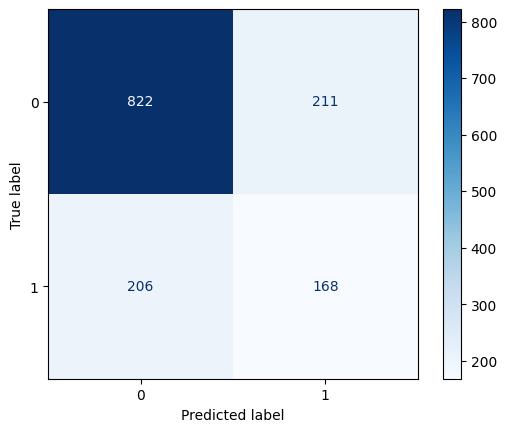

In [35]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()


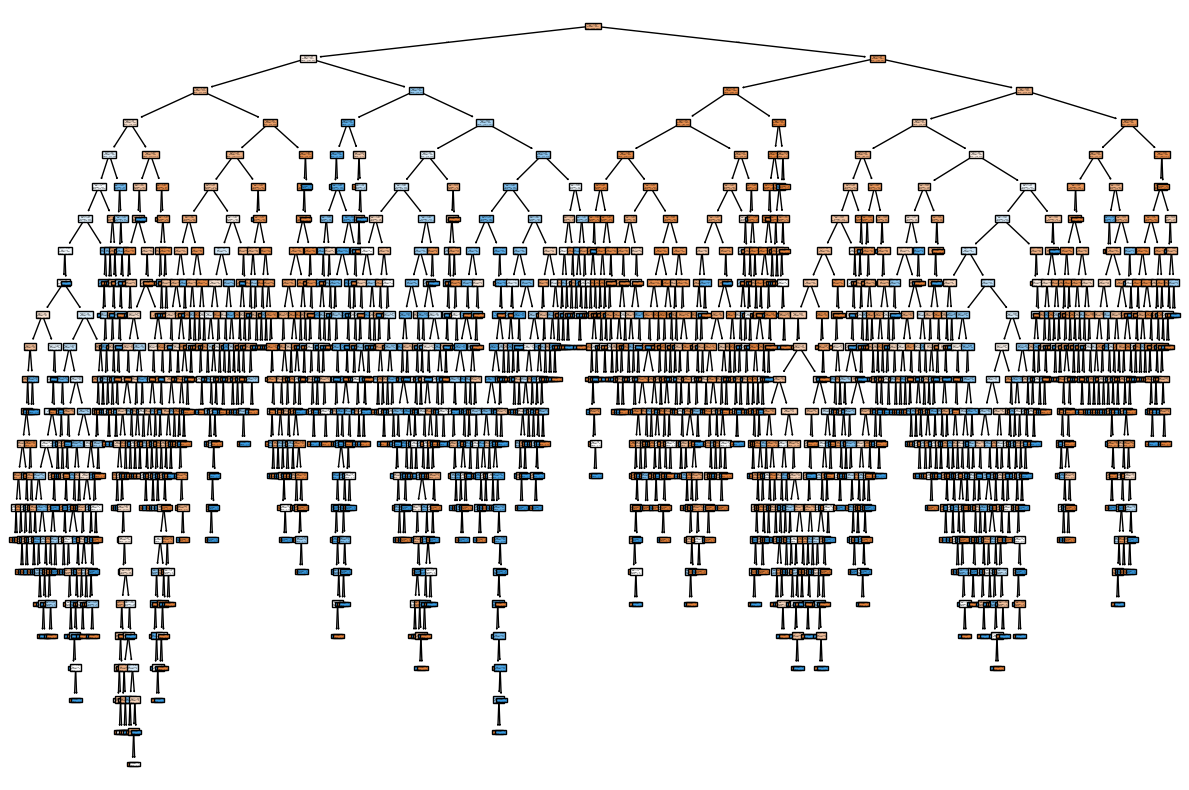

In [36]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)
plt.show()

# Decision tree with hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

Define hyperparameters that will be tested by GridSeachCV

In [38]:
param_grid = {
    'criterion': ['gini', 'entropy'],       # two ways of choosing splits
    'max_depth': [3, 5, 7, 10, None],       # how deep the tree can go
    'min_samples_split': [2, 5, 10]         # mininum  samples required to split
}

#2 criterias,5 depths and 3 sample splits,so 30 models will be tested

create an instance of GridSearchCV

In [39]:
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),   # the model being tuned
    param_grid=param_grid,                               # hyperparameters to test
    cv=5,                                                # 5-fold cross validation
    scoring='accuracy',                                  # choose the best by accuracy
    n_jobs=-1                                            # use all CPU cores
)

Train GridSearchCV(tries many models)

In [40]:
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

 Print the best hyperparameters found

In [41]:
print("Best Parameters:", grid_dt.best_params_) #shows th best settings

print("Best Cross-Validation Accuracy:", grid_dt.best_score_) #best accuracy

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7905777777777778


# Accuracy of tuned decision tree

In [42]:
best_dt = grid_dt.best_estimator_  #best model

In [43]:
y_pred_best = best_dt.predict(X_test)

In [44]:
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Decision Tree Accuracy: 0.7846481876332623


In [45]:
print("\nClassification Report (Tuned Model):\n")
print(classification_report(y_test, y_pred_best))


Classification Report (Tuned Model):

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.40      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



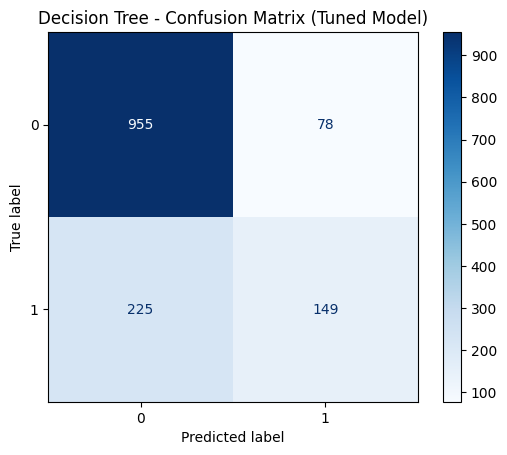

In [46]:
# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix (Tuned Model)")
plt.show()

Tuned Decision Tree AUC: 0.8101487800963912


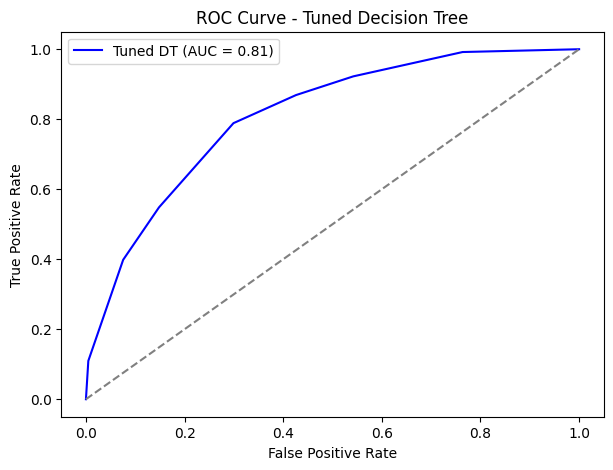

In [47]:
#ROC-AUC Curve

# Probabilities for class 1
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Tuned Decision Tree AUC:", auc_dt)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Tuned DT (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree')
plt.legend()
plt.show()


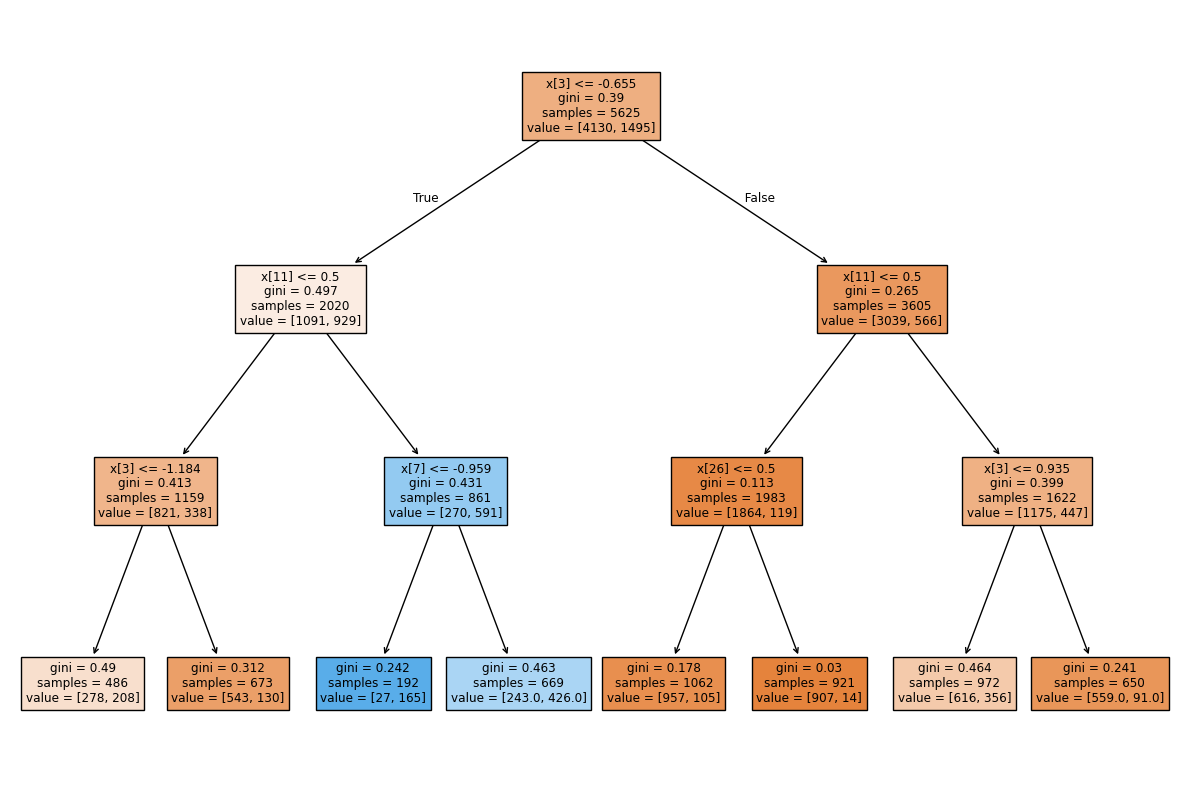

In [48]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_dt,filled=True)
plt.show()

# Neural Network Modeling

In [49]:
import tensorflow as tf

In [50]:
# Initialize the model
model = tf.keras.models.Sequential()

# INPUT + HIDDEN LAYER
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
#train the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7418 - loss: 0.5461 - val_accuracy: 0.7884 - val_loss: 0.4360
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8010 - loss: 0.4281 - val_accuracy: 0.7991 - val_loss: 0.4154
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7881 - loss: 0.4387 - val_accuracy: 0.8018 - val_loss: 0.4085
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8062 - loss: 0.4218 - val_accuracy: 0.8053 - val_loss: 0.4058
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - loss: 0.4192 - val_accuracy: 0.8044 - val_loss: 0.4040
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.4033 - val_accuracy: 0.8000 - val_loss: 0.4041
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4110 - val_accuracy: 0.8053 - val_loss: 0.4021
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.4323 - val_accuracy: 0

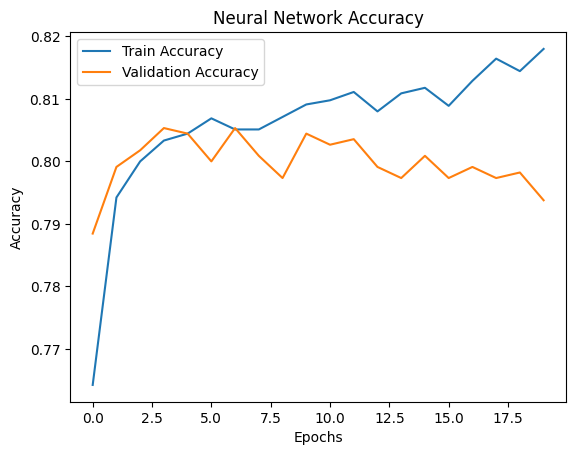

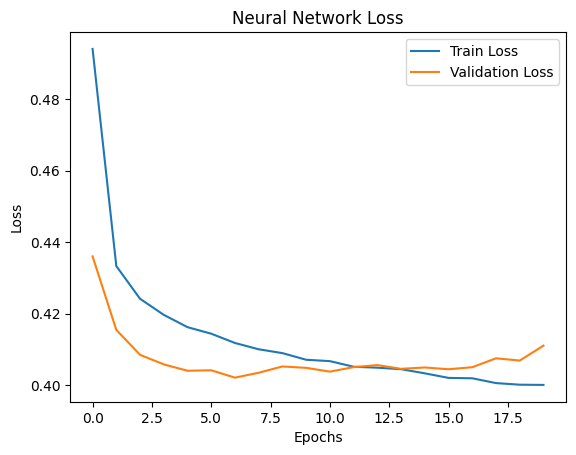

In [52]:
#training curves

#plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Neural Network Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy of Neural Network

In [53]:

y_pred_nn_prob = model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Accuracy: 0.7931769722814499

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [54]:
import itertools

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion matrix, without normalization
[[923 110]
 [181 193]]


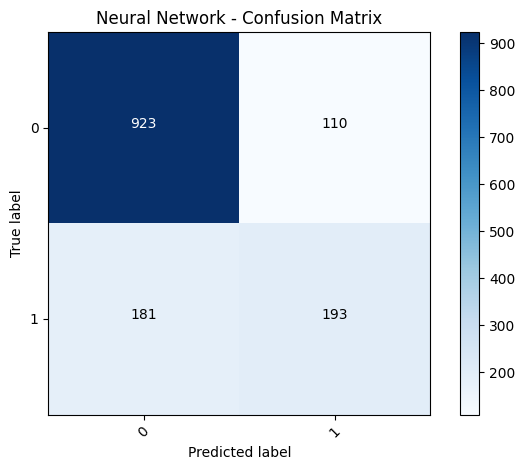

In [55]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color="white" if cm[i,j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot using custom function
plot_confusion_matrix(cm_nn, classes=[0,1], normalize=False,
                      title="Neural Network - Confusion Matrix")
plt.show()

# Neural Network with hyperparameter tuning

install keras tuner

In [56]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.0 MB/s eta 0:00:00


In [57]:
#import keras tuner
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
#build model
def build_model(hp):
    model = Sequential()

    # Tune number of neurons in first layer
    hp_units = hp.Int('units', min_value=16, max_value=64, step=16)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(X_train.shape[1],)))

    # Tune whether to add a second hidden layer
    if hp.Boolean("second_layer"):
        hp_units2 = hp.Int('units2', min_value=16, max_value=64, step=16)
        model.add(Dense(units=hp_units2, activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [59]:
#create tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,         # tries 5 different combinations
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='churn_tuning'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
#run tuner
tuner.search(X_train, y_train,
             epochs=20,
             batch_size=32,
             validation_split=0.2)

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.8088889122009277

Best val_accuracy So Far: 0.8097777962684631
Total elapsed time: 00h 01m 22s


In [61]:
#get best parameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("BEST HYPERPARAMETERS:")
print("Units:", best_hp.get('units'))
print("Second layer:", best_hp.get('second_layer'))
if best_hp.get('second_layer'):
    print("Units in second layer:", best_hp.get('units2'))
print("Learning rate:", best_hp.get('learning_rate'))

BEST HYPERPARAMETERS:
Units: 32
Second layer: False
Learning rate: 0.001


In [62]:
#build model
best_model = tuner.hypermodel.build(best_hp)

#train model
history = best_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.5544 - val_accuracy: 0.7929 - val_loss: 0.4346
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7925 - loss: 0.4355 - val_accuracy: 0.7991 - val_loss: 0.4181
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4357 - val_accuracy: 0.7956 - val_loss: 0.4132
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8083 - loss: 0.4129 - val_accuracy: 0.8000 - val_loss: 0.4058
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8028 - loss: 0.4172 - val_accuracy: 0.7973 - val_loss: 0.4063
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8019 - loss: 0.4164 - val_accuracy: 0.8036 - val_loss: 0.4035
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8039 - loss: 0.4134 - val_accuracy: 0.8089 - val_loss: 0.4048
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8062 - loss: 0.4024 - val_accuracy: 0.8062 - val_

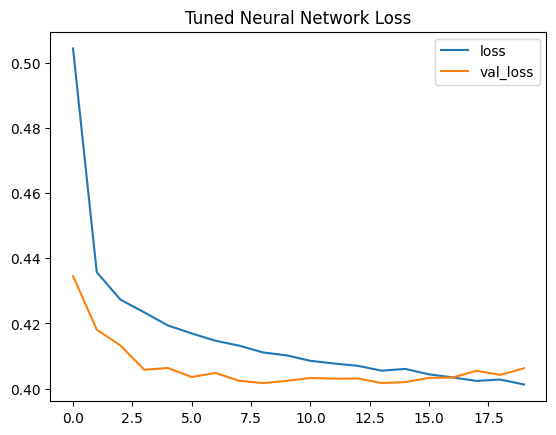

In [63]:
#plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Tuned Neural Network Loss")
plt.show()

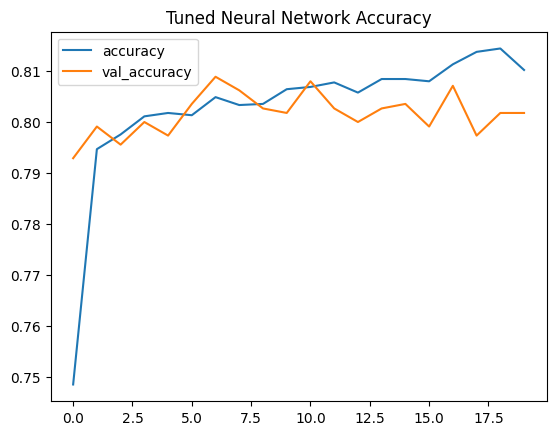

In [64]:
#plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title("Tuned Neural Network Accuracy")
plt.show()

# Accuracy of tuned model

In [65]:
y_pred_prob = best_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Tuned NN Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Tuned NN Accuracy: 0.7917555081734187

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



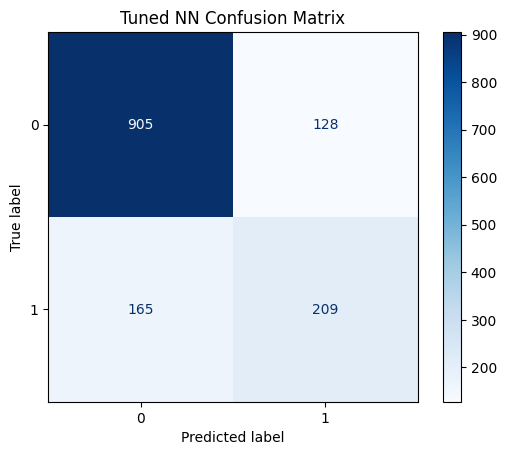

In [66]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Tuned NN Confusion Matrix")
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Tuned Neural Network AUC: 0.8348263973370744


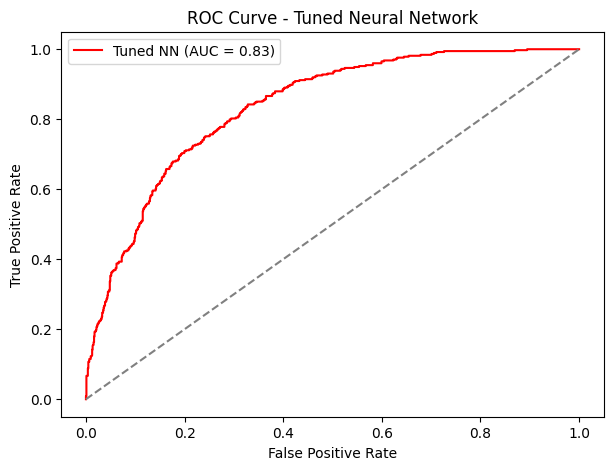

In [67]:
#ROC_AUC Curve

# Probabilities from tuned NN
y_prob_nn = best_model.predict(X_test)  # SciKeras returns probabilities directly

# ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_prob_nn)
auc_nn = roc_auc_score(y_test, y_prob_nn)
print("Tuned Neural Network AUC:", auc_nn)

# Plot
plt.figure(figsize=(7,5))
plt.plot(fpr_nn, tpr_nn, color='red', label=f'Tuned NN (AUC = {auc_nn:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Neural Network')
plt.legend()
plt.show()

# Final Evaluation

In [68]:
#Compute metrics for Tuned Decision Tree
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

acc_dt = accuracy_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
cm_dt = confusion_matrix(y_test, y_pred_dt)

#Compute metrics for Tuned Neural Network
y_pred_nn = (best_model.predict(X_test) > 0.5).astype(int)
y_prob_nn = best_model.predict(X_test)

acc_nn = accuracy_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_prob_nn)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)
cm_nn = confusion_matrix(y_test, y_pred_nn)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


================== Final Model Comparison ==================

             Metric      Tuned Decision Tree      Tuned Neural Network
0          Accuracy                    0.785                     0.792
1           ROC-AUC                     0.81                     0.835
2        Precision                     0.656                      0.62
3           Recall                     0.398                     0.559
4         F1-score                     0.496                     0.588
5  Confusion Matrix  [[955, 78], [225, 149]]  [[905, 128], [165, 209]]


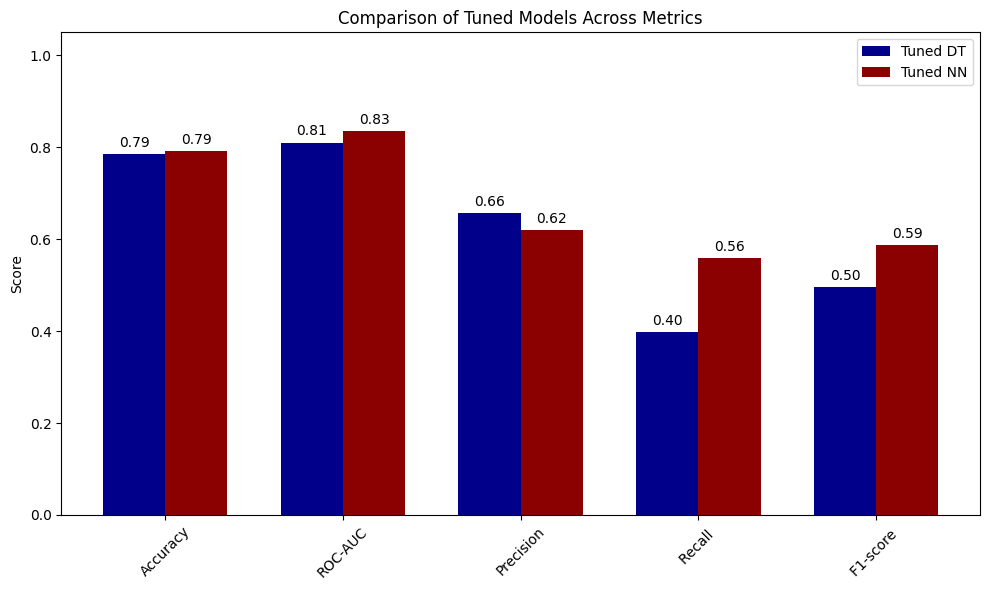

In [69]:
print("================== Final Model Comparison ==================\n")
#comparison table
data = {
    "Metric": ["Accuracy", "ROC-AUC", "Precision ", "Recall ", "F1-score ", "Confusion Matrix"],
    "Tuned Decision Tree": [
        round(acc_dt, 3),
        round(auc_dt, 3),
        round(report_dt['1']['precision'], 3),
        round(report_dt['1']['recall'], 3),
        round(report_dt['1']['f1-score'], 3),
        f"{cm_dt.tolist()}"
    ],
    "Tuned Neural Network": [
        round(acc_nn, 3),
        round(auc_nn, 3),
        round(report_nn['1']['precision'], 3),
        round(report_nn['1']['recall'], 3),
        round(report_nn['1']['f1-score'], 3),
        f"{cm_nn.tolist()}"
    ]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)

#Metrics to plot
metrics = ["Accuracy", "ROC-AUC", "Precision", "Recall ", "F1-score "]
dt_values = [
    round(acc_dt, 3),
    round(auc_dt, 3),
    round(report_dt['1']['precision'], 3),
    round(report_dt['1']['recall'], 3),
    round(report_dt['1']['f1-score'], 3)
]
nn_values = [
    round(acc_nn, 3),
    round(auc_nn, 3),
    round(report_nn['1']['precision'], 3),
    round(report_nn['1']['recall'], 3),
    round(report_nn['1']['f1-score'], 3)
]

#X-axis positions
x = np.arange(len(metrics))
width = 0.35  # width of bars

# Plot
fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, dt_values, width, label='Tuned DT', color='darkblue')
bars2 = ax.bar(x + width/2, nn_values, width, label='Tuned NN', color='darkred')

#Add text labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

#Labels and title
ax.set_ylabel('Score')
ax.set_title('Comparison of Tuned Models Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45)
ax.set_ylim(0,1.05)  # since metrics are 0-1
ax.legend()
plt.tight_layout()
plt.show()